# Problem statement

One pressing issue faced by taxi operators is the over-supply in downtown area and the insufficient demand within its surrounding areas during peak hours. Our report aimed to help the operators proactively allocate their idle vehicles from downtown to the demanding areas. We selected both the linear ARIMA hybrid model and regression tree as the baseline to predict region demands using weather information, and to optimize the dispatch strategy under the network flow problem structure by utilizing the predicted demands. 

# 1) Understand the data

In [1]:
import pandas as pd

train_demand = pd.read_csv('train demand.csv')

In [2]:
display(train_demand.head())

,Date,ALEXANDRA HILL,BENDEMEER,CAIRNHILL,CHATSWORTH,LEONIE HILL,NASSIM,ROBERTSON QUAY,TIONG BAHRU STATION
0,DAY 1,20.525285,3.525285,5.762642,3.203303,81.304443,8.881321,9.965945,1.203303
1,DAY 2,12.203303,1.643964,0.000000,5.440661,83.219818,8.881321,13.847267,11.406606
2,DAY 3,0.762642,6.084624,3.881321,15.321982,78.982461,9.203303,0.203303,11.287927
3,DAY 4,0.000000,0.000000,0.000000,9.643964,87.423121,5.762642,9.965945,10.406606
4,DAY 5,0.000000,6.525285,5.762642,3.321982,85.423121,7.762642,0.000000,0.000000


In [3]:
display(train_demand.mean())

ALEXANDRA HILL          5.624605
BENDEMEER               6.931307
CAIRNHILL               5.570492
CHATSWORTH              8.622142
LEONIE HILL            85.114822
NASSIM                 10.885416
ROBERTSON QUAY          9.392724
TIONG BAHRU STATION     6.865126
dtype: float64

Text(0, 0.5, 'demand')

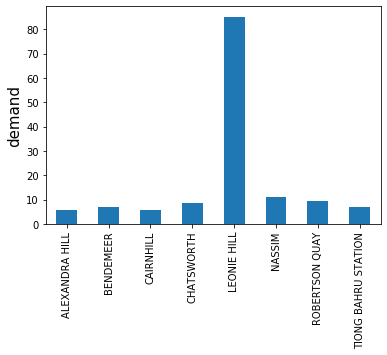

In [4]:
# To visualize the top demand for each region.

ax1 = train_demand.mean().plot.bar()
ax1.set_ylabel('demand',size=15)

Figure above (Figure 1) is the average demand according to location. We can see that Leonie Hill has the most demand. On the one hand, taxi driver may not the demand is high there, which is what we are trying to solve. On the other hand, Leonie Hill has the lowest average price ($14). This might explain why taxi drivers do not want to go there.

Text(0.5, 0, 'Day')

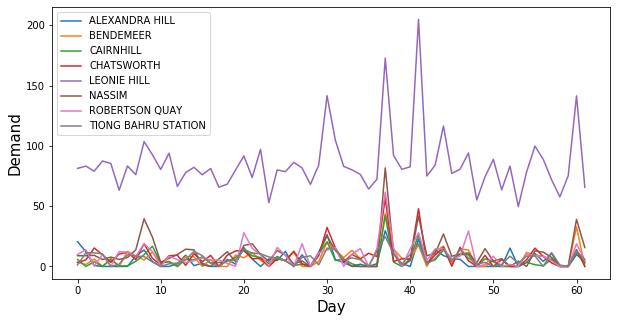

In [5]:
# To visualize the demand from a Time Series dimension
ax2 = train_demand.plot(legend=True,figsize=(10,5))
ax2.set_ylabel('Demand',size=15)
ax2.set_xlabel('Day',size=15)

Figure above (Figure 2) depicts the demand of each location for each day. Each line represents the daily demand for one zone. We can see the distribution ("shape") of each location w.r.t day is roughly the same that share the similar trend, just different in magnitude.

In [6]:
# To study the weather datasets
train_weather = pd.read_csv("train weather.csv")
train_weather.mean()

S08_Rain_Duration     1.814516
S107_Rain_Duration    2.741935
S108_Rain_Duration    2.741935
S78_Rain_Duration     2.661290
S79_Rain_Duration     2.298387
S88_Rain_Duration     2.540323
S08_Rain_Amount       0.124194
S107_Rain_Amount      0.393548
S108_Rain_Amount      0.470968
S78_Rain_Amount       0.269355
S79_Rain_Amount       0.240323
S88_Rain_Amount       0.200000
dtype: float64

In [7]:
train_weather.mean(axis=1)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
57     0.0
58     0.0
59     0.0
60    15.2
61     0.0
Length: 62, dtype: float64

In [8]:
train_weather.head()

,Date,S08_Rain_Duration,S107_Rain_Duration,S108_Rain_Duration,S78_Rain_Duration,S79_Rain_Duration,S88_Rain_Duration,S08_Rain_Amount,S107_Rain_Amount,S108_Rain_Amount,S78_Rain_Amount,S79_Rain_Amount,S88_Rain_Amount
0,DAY 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DAY 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DAY 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DAY 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DAY 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_weather.iloc[:,7:].head()

,S08_Rain_Amount,S107_Rain_Amount,S108_Rain_Amount,S78_Rain_Amount,S79_Rain_Amount,S88_Rain_Amount
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Day')

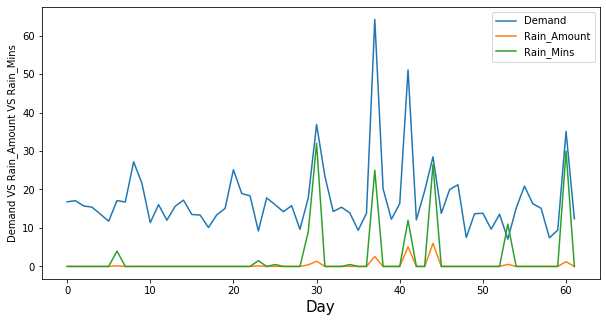

In [10]:
ax2 = train_demand.mean(axis=1).plot(figsize=(10,5),label='Demand',legend=True) # To see the overall demand for each day
# ax2 = train_weather.mean(axis=1).plot(figsize=(10,5),label='Rain',legend=True)  
ax2 = train_weather.iloc[:,7:].mean(axis=1).plot(figsize=(10,5),label='Rain_Amount',legend=True) 
#To see the overall rain amount for each day

ax2 = train_weather.iloc[:,:6].mean(axis=1).plot(figsize=(10,5),label='Rain_Mins',legend=True) 
#To see the overall rain minutes for each day

ax2.set_ylabel('Demand VS Rain_Amount VS Rain_Mins',size=10)
ax2.set_xlabel('Day',size=15)

Figure above is the average demand for each day plot together with the rain duration of each day. From the figure we observe a strong correlation: as the rain quantity increases, so does the taxi demand. However, there are indeed some fluctuation that is not related to the whether, e.g. day 1 to day 25 when the rain duration is constantly 0.

Text(0.5, 0, 'Day')

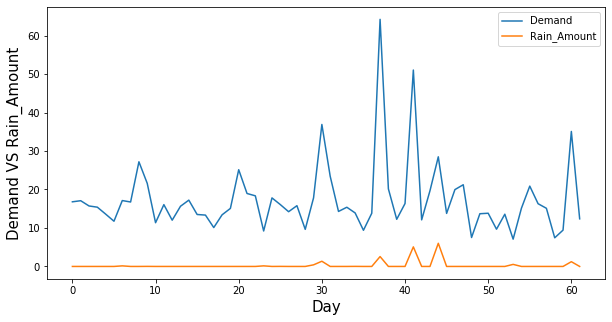

In [11]:
# Demand VS Rain Amount
ax3 = train_demand.mean(axis=1).plot(figsize=(10,5),label='Demand',legend=True) # To see the overall demand for each day
ax3 = train_weather.iloc[:,7:].mean(axis=1).plot(figsize=(10,5),label='Rain_Amount',legend=True) #To see the overall rain amount for each day
ax3.set_ylabel('Demand VS Rain_Amount',size=15)
ax3.set_xlabel('Day',size=15)

Text(0.5, 0, 'Day')

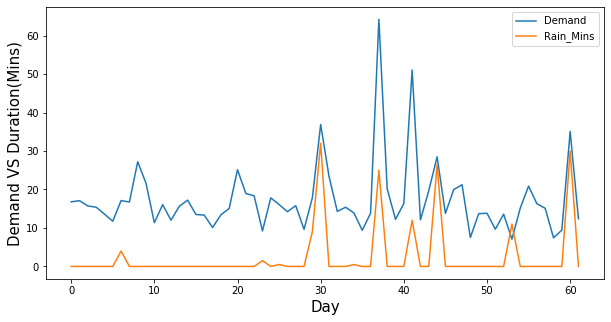

In [12]:
# Demand VS Rain Duration(Mins)
ax4 = train_demand.mean(axis=1).plot(figsize=(10,5),label='Demand',legend=True) # To see the overall demand for each day
ax4 = train_weather.iloc[:,:6].mean(axis=1).plot(figsize=(10,5),label='Rain_Mins',legend=True) 
#To see the overall rain minutes for each day
ax4.set_ylabel('Demand VS Duration(Mins)',size=15)
ax4.set_xlabel('Day',size=15)

Figure above is the average demand for each day plot together with the rain duration of each day. From the figure we observe a strong correlation: as the rain quantity increases, so does the taxi demand. However, there are indeed some fluctuation that is not related to the whether, e.g. day 1 to day 25 when the rain duration is constantly 0.

# 2) Elaborate the framework of your decision making for vehicle dispatch

### 2.1 Predictive Model

We have very limited data so we must not make the model to complex as it may cause the risk if overfitting. The assumptions I made:

+ **The demand of 8 locations are independent**, i.e. one's demand does not effect demands elsewhere.
+ **Given the total demand, the proportion of each location is static**, described by the distribution in Figure 1.
+ **The total demand depends on whether and a random time series.** Let total demand at day $t$ be $D_t$, average rain duration be $r_t$, $D_t = w_0 + w_1 \cdot r_t + d_t$ where $d_t$ is the mentioned random time series, $w_0$ and $w_1$ are parameters to be determine.
+ **Term $d_t$ can be modeled by ARIMA.** The $d_t$ term becomes the sole factor for non-rain days (ignoring the constant $w_0$). 

As a result, we can use the data in hand to learn a predictive model $D_t = w_0 + w_1 * r_t + d_t$ and predict the total demand, after that we compute the demand for each location simply by multiply the total demand with the distribution in Figure 1.

### 2.2 Dispatch Model

To dispatch, we only consider income, and this leads to a trivial solution: first fulfill demand in Robertson Quay which has the highest income, then Nassim which has the second ans so on. However, this solution might not fair to the clients in Leonie Hill zone. We will model how much percentage of demand in less-priority locations like Leonie Hill will be left unfuilled for each senario, but we will not try to solve the problem as it would be a business (or even philosophical) decision whether to compensate this unfairness.

# 3) Build your prediction models with training data

### 3.1 Linear Regression Part:

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Training Model -- Using Training Datasets
ys = train_demand.sum(axis=1).values   # numpy.ndarray 
xs = ax4 = train_weather.iloc[:,:6].mean(axis=1).values.reshape(-1,1) # numpy.ndarray

reg = LinearRegression().fit(xs,ys)
# reg.score(ys.reshape(-1,1),reg.predict(xs))

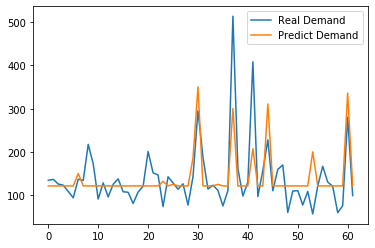

In [14]:
import matplotlib.pyplot as plt

plt.plot(ys,label='Real Demand')
plt.plot(reg.predict(xs),label="Predict Demand")
plt.legend()
plt.show()

In [15]:
# To see the Linear Model Parameter
reg.coef_, reg.intercept_

(array([7.15317187]), 121.46982412780726)

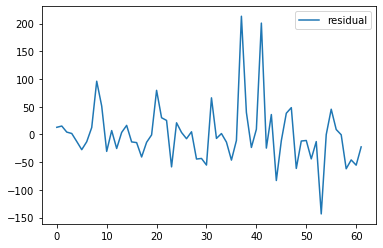

In [16]:
residual = ys - reg.predict(xs)
plt.plot(residual, label="residual")
plt.legend()

### 3.2 ARIMA part (Seasonal ARIMA Model)

In [17]:
import statsmodels.api as sm
import itertools

In [18]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [19]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(residual, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:663.2822406568004
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:539.4766840870437
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:577.6471361287201
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:427.79336502040195
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:550.6968275739721
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:541.316867468258
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:443.8935080087473
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:428.6986411845606
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:654.8467779467859
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:531.4712515477007
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:568.1102991274574
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:418.8888030288379
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:552.5921964943328
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:533.2094164877414
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:445.83526179420045
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:419.88663983120676
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:689.4926525784823
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:561.2669328759957
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:594.23068

Pick up lowest AIC score

ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:410.34418511188477

Optimal ARIMA Model

In [20]:
model = sm.tsa.statespace.SARIMAX(residual,
                                  order=(0, 1, 1),
                                  seasonal_order=(0, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()

# print(results.summary())
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9187      0.142     -6.466      0.000      -1.197      -0.640
ma.S.L12      -1.0000      0.162     -6.187      0.000      -1.317      -0.683
sigma2      4417.4443   3.66e-05   1.21e+08      0.000    4417.444    4417.444


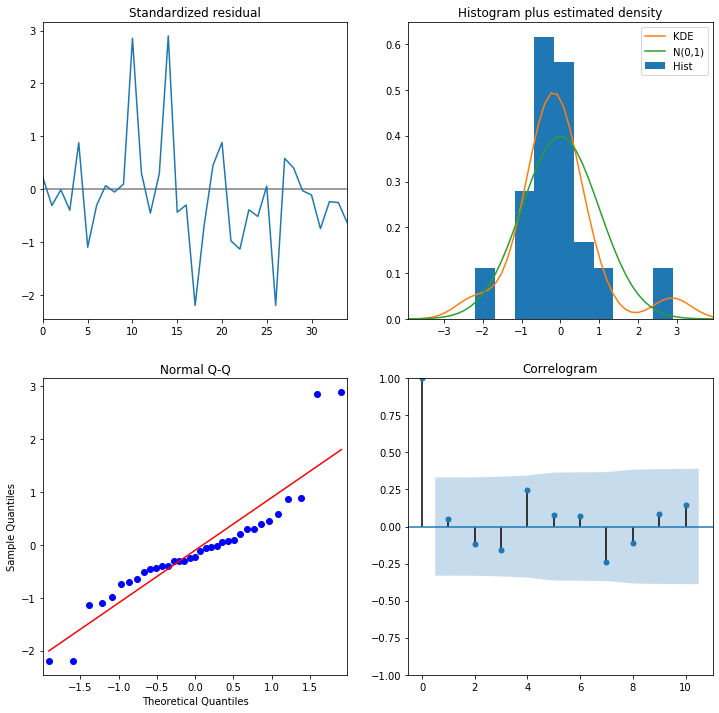

In [21]:
results.plot_diagnostics(figsize=(12, 12))
plt.show()

# 4) Evaluate your prediction models with test data

### 4.1  linear regression Model Evaluation

In [22]:
# Test Model  -- Using Testing Datasets
test_demand = pd.read_csv('test_demand.csv')
test_weather = pd.read_csv("test_weather.csv")

y_test = test_demand.sum(axis=1).values
# display(y_test,type(y_test))

x_test = test_weather.iloc[:,:6].mean(axis=1).values.reshape((-1, 1))
# display(x_test,type(x_test))

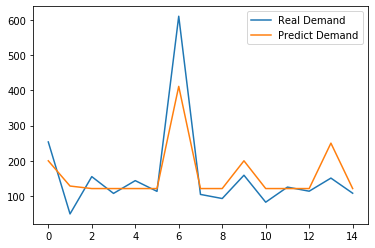

In [23]:
plt.plot(y_test, label="Real Demand")
plt.plot(reg.predict(x_test), label="Predict Demand")
plt.legend()

In [24]:
test_weather.head()

,Date,S08_Rain_Duration,S107_Rain_Duration,S108_Rain_Duration,S78_Rain_Duration,S79_Rain_Duration,S88_Rain_Duration,S08_Rain_Amount,S107_Rain_Amount,S108_Rain_Amount,S78_Rain_Amount,S79_Rain_Amount,S88_Rain_Amount
0,DAY 63,12.5,37.5,0.0,5.0,0.0,7.5,0.8,6.7,0.0,0.2,0.0,0.3
1,DAY 64,2.5,0.0,0.0,0.0,2.5,0.0,0.1,0.0,0.0,0.0,0.1,0.0
2,DAY 65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DAY 66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DAY 67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.2 ARIMA Model Evaluation

In [25]:
pred = results.get_prediction(start=len(xs),
                              end=len(xs) + len(x_test) - 1,
                              dynamic=False)
pred.predicted_mean
# pred_ci = pred.conf_int()

array([-16.51630641, -39.76692495, -39.93712708, -35.65741224,
       -46.33798528,   6.93560987,  -6.003511  , -10.64152474,
       -33.41195018, -43.95602632, -51.23484084,   6.6702835 ,
       -22.65969301, -45.91031155, -46.08051368])

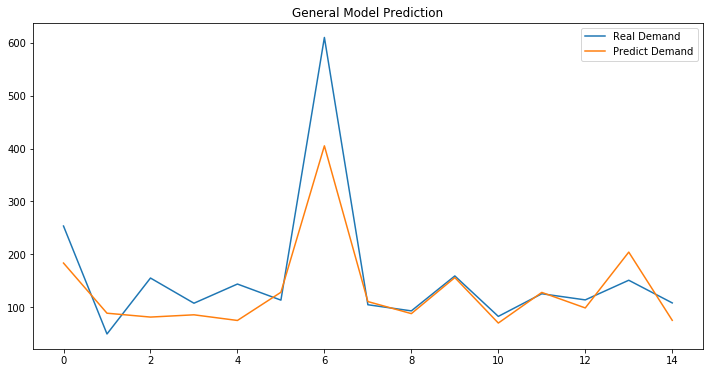

In [26]:
ax = test_demand.sum(axis=1).plot(label='Real Demand',figsize=(12, 6),title='General Model Prediction')
ax.plot(pred.predicted_mean + reg.predict(x_test), label="Predict Demand")
ax.legend()

### 4.3 Predict for each location

In [27]:
test_demand_pred = test_demand.copy()
test_demand_pred

,Date,ALEXANDRA HILL,BENDEMEER,CAIRNHILL,CHATSWORTH,LEONIE HILL,NASSIM,ROBERTSON QUAY,TIONG BAHRU STATION
0,DAY 63,10.203303,28.321982,18.762642,25.440661,116.135194,27.440661,17.847267,9.440661
1,DAY 64,0.000000,0.000000,0.000000,0.000000,46.101139,0.881321,0.000000,2.609909
2,DAY 65,5.321982,15.084624,2.440661,10.643964,79.101139,16.881321,13.525285,12.321982
3,DAY 66,2.525285,0.000000,5.203303,5.762642,69.982461,4.440661,11.287927,8.525285
4,DAY 67,11.084624,9.643964,1.762642,14.321982,84.660479,6.000000,10.965945,5.525285
5,DAY 68,2.762642,7.881321,2.440661,5.881321,67.660479,13.881321,6.406606,6.643964
6,DAY 69,26.762642,46.203303,59.203303,75.321982,250.897836,70.321982,52.762642,28.525285
7,DAY 70,2.084624,3.084624,2.762642,0.000000,78.863782,0.000000,9.525285,8.525285
8,DAY 71,4.203303,0.000000,4.321982,0.000000,71.423121,0.000000,11.643964,1.643964
9,DAY 72,0.321982,27.440661,11.881321,4.440661,101.779158,4.321982,7.643964,1.440661


In [28]:
# Average daily demand for each zone
train_demand.mean()

ALEXANDRA HILL          5.624605
BENDEMEER               6.931307
CAIRNHILL               5.570492
CHATSWORTH              8.622142
LEONIE HILL            85.114822
NASSIM                 10.885416
ROBERTSON QUAY          9.392724
TIONG BAHRU STATION     6.865126
dtype: float64

In [29]:
# Total Demand for 8 Zones, sum up average Daily demand for each zone
mean_sum = train_demand.mean().sum()
mean_sum

139.00663258482257

In [30]:
# Looping out each Column Name(Zone) & Daily demand
predict_result = pd.DataFrame()

for col,mean in zip(train_demand.columns[1:],train_demand.mean()):
    weightage = mean / mean_sum # Caculate the weightage for each zone in training datasets
    test_demand_pred[col] = weightage * (pred.predicted_mean + reg.predict(x_test))
    # print(test_demand_pred[col],type(test_demand_pred[col]))

# Store the predict results
display(test_demand_pred)
# test_demand_pred = test_demand_pred.to_csv("Predict_Result.csv")

,Date,ALEXANDRA HILL,BENDEMEER,CAIRNHILL,CHATSWORTH,LEONIE HILL,NASSIM,ROBERTSON QUAY,TIONG BAHRU STATION
0,DAY 63,7.430534,9.156787,7.359047,11.390509,112.443198,14.380468,12.408507,9.069357
1,DAY 64,3.595370,4.430642,3.560780,5.511461,54.407250,6.958195,6.004034,4.388338
2,DAY 65,3.299046,4.065476,3.267306,5.057215,49.923092,6.384712,5.509191,4.026659
3,DAY 66,3.472215,4.278876,3.438810,5.322672,52.543594,6.719851,5.798373,4.238021
4,DAY 67,3.040049,3.746309,3.010801,4.660190,46.003798,5.883470,5.076683,3.710539
5,DAY 68,5.195650,6.402698,5.145664,7.964583,78.623627,10.055251,8.676397,6.341564
6,DAY 69,16.394325,20.203035,16.236599,25.131399,248.088543,31.728281,27.377454,20.010136
7,DAY 70,4.484429,5.526247,4.441286,6.874329,67.861013,8.678810,7.488704,5.473482
8,DAY 71,3.563073,4.390842,3.528793,5.461951,53.918508,6.895690,5.950099,4.348918
9,DAY 72,6.320245,7.788556,6.259439,9.688510,95.641648,12.231702,10.554397,7.714191


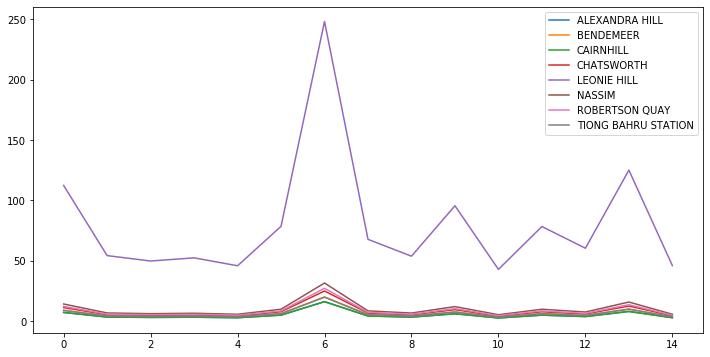

In [31]:
# Visulize the demand for each zone in one plot
test_demand_pred.plot(label = 'Predict Demand',figsize = (12,6),legend = True)

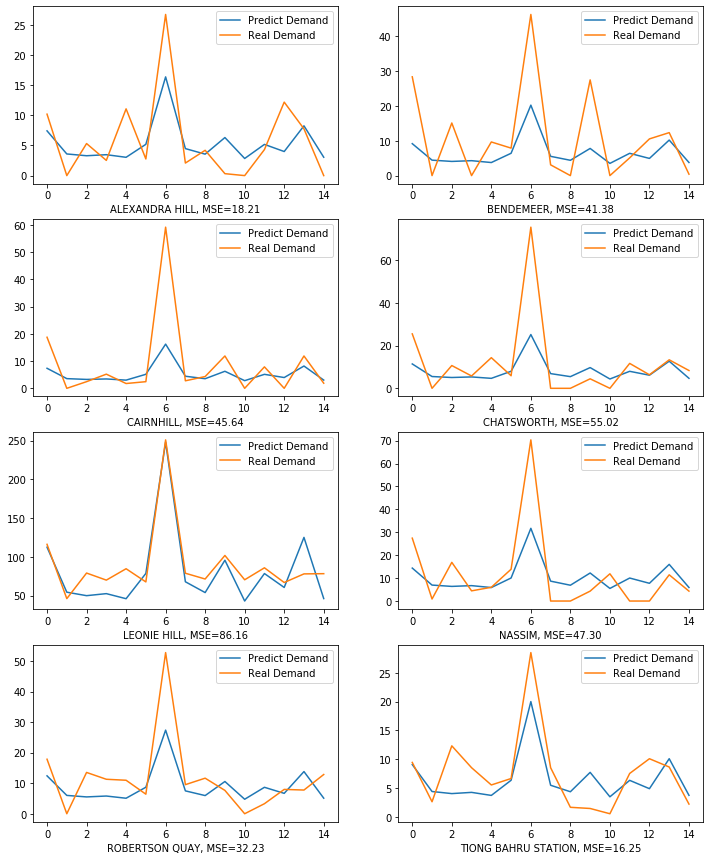

In [32]:
# Visulization for each zone in one Subplot
figure, axes = plt.subplots(4,2,figsize=(12,15))

for i,col in enumerate(train_demand.columns[1:]):
    test_demand_pred[col].plot(ax=axes[i // 2][i % 2],label='Predict Demand',legend = True)
    test_demand[col].plot(ax=axes[i // 2][i % 2],label='Real Demand',legend = True)
    diff = test_demand_pred[col] - test_demand[col]
    mse = np.sqrt((diff.values**2).sum())
    axes[i // 2][i % 2].set_xlabel(col + ', MSE=%.2f'%(mse))


# 5) Demonstrate how to derive the vehicle dispatch decisions

Let's just take first day in the test set as one example. The real demand and the predict demand are as follows:

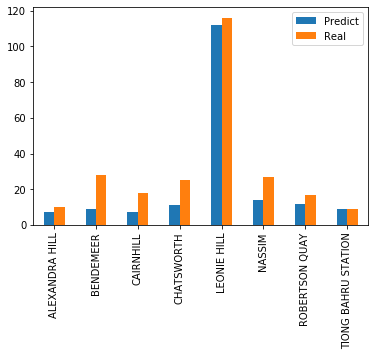

In [33]:
test_day1 = pd.DataFrame()
test_day1['Predict'] = test_demand_pred.iloc[0].drop('Date').astype(int)
test_day1["Real"] = test_demand.iloc[0].drop("Date").astype(int)

test_day1.plot.bar()

In [34]:
test_day1['Satisfaction Rate'] = test_day1['Predict'] / test_day1["Real"]
test_day1

,Predict,Real,Satisfaction Rate
ALEXANDRA HILL,7,10,0.700000
BENDEMEER,9,28,0.321429
CAIRNHILL,7,18,0.388889
CHATSWORTH,11,25,0.440000
LEONIE HILL,112,116,0.965517
NASSIM,14,27,0.518519
ROBERTSON QUAY,12,17,0.705882
TIONG BAHRU STATION,9,9,1.000000


In [35]:
test_day1 = test_day1.to_csv('test_day1.csv')

As depicted in the above figure, we have rough but not completed accurate prediction. According to our dispatch plan, we sent available taxis to locations in a highest-income-first order. The dispatch order are shown in the following table.

|  Location   | Average order value |
|  ----  | ----  | 
| Robertson Quay  | \$19 |
| Nassim  |  \$18|
| Alexandra Hill | \$17 |
| BendeMeer | \$16 |
| Tiong Bahru Station | \$16| 
| Chatsworth  |  \$15 | 
| Cairnhill  |  \$14 |
| Leonie Hill  |  \$14 | 

**60 taxi senario**:

1. 16 taxis are sent to Robertson Quay (as 12 is the predicted number), real demand is 17. Income is 12 * (19 - 2)  = \$204, satisfaction rate is 12 / 17 = 70.59%. 60 - 12 = 48 taxis left.
2. 19 taxis are sent to Nassim, real demand is 27. Income is 19 * 18 = \$342, satisfaction rate is 19 / 27 = 70.37%. 44 - 19 = 25 taxis left.
3. 9 taxis are sent to Alexandra Hill, real demand is 10. Income is 9 * 17 = \$153, satisfaction rate is 9 / 10 = 90.00%. 25 - 9 = 16 taxis left.
4. 12 taxis are sent to BendeMeer, real demand is 28. Income is 12 * 16 = \$192, satisfaction rate is 12 / 28 = 42.86%. 16 - 12 = 4 taxis left.
5. Trying to send 11 taxis to Tiong Bahru Station but there are only 4 left so we can only send 4. Real demand is 9. Income is 4 * 16 = \$64, satisfaction rate is 4 / 9 = 44.44%. No taxis left.
6. Satisfaction rate and income in Chatsworth, Cairnhill, and Leonie Hill are zero.

Total income increase is 304 + 342 + 153 + 192 + 64 = \$1055. Five out of eight locations will witness a improved satisfaction rate, while three of them will not. For Robertson Quay and Alexandra Hill, improvements are significant, 90%+ demand are met.

**300 taxi senario**:

1. 16 taxis are sent to Robertson Quay (as 16 is the predicted number), real demand is 17. Income is 16 * 19 = \$304, satisfaction rate is 16 / 17 = 94.12%. 300 - 16 = 284 taxis left.
2. 19 taxis are sent to Nassim, real demand is 27. Income is 19 * 18 = \$342, satisfaction rate is 19 / 27 = 70.37%. 284 - 19 = 265 taxis left.
3. 9 taxis are sent to Alexandra Hill, real demand is 10. Income is 9 * 17 = \$153, satisfaction rate is 9 / 10 = 90.00%. 265 - 9 = 256 taxis left.
4. 12 taxis are sent to BendeMeer, real demand is 28. Income is 12 * 16 = \$192, satisfaction rate is 12 / 28 = 42.86%. 256 - 12 = 244 taxis left.
5. 11 taxis are sent to Tiong Bahru Station, real demand is 9. Income is 9 * 16 = \$144, satisfaction rate is 9 / 9 = 100%. 244 - 11 = 233 taxis left.
6. 15 taxis are sent to Chatsworth, real demand is 25. Income is 15 * 15 = \$225, satisfaction rate is 15 / 25 = 60.00%. 233 - 15 = 218 taxis left.
7. 9 taxis are sent to Cairnhill, real demand is 18. Income is 9 * 14 = \$126, satisfaction rate is 9 / 18 = 50.00%. 218 - 9 = 209 taxis left.
8. 148 taxis are sent to Chatsworth, real demand is 116. Income is 116 * 14 = \$1624, satisfaction rate is 116 / 116 = 100.00%. 209 - 148 = 61 taxis left **in downtown**.

Total income increase is 304 + 342 + 153 + 192 + 144 + 255 + 126 + 1624 = \$3110. All of eight locations will witness a improved satisfaction rate. six out of eight with satisfaction rate over 60%.

# 6) Evaluate your vehicle dispatch method

In [43]:
# Define compute_profit for Prediction
def compute_profit(pred_demand, real_demand, taxi_num, log=False):
    order_and_price = {
        "ROBERTSON QUAY": 19,
        "NASSIM": 18,
        "ALEXANDRA HILL": 17,
        "BENDEMEER": 16,
        "TIONG BAHRU STATION": 16,
        "CHATSWORTH": 15,
        "CAIRNHILL": 14,
        "LEONIE HILL": 14
    }
    
    total_income = 0
    cost = 2
    #Looping the Dict
    for col, price in order_and_price.items():
        pred = pred_demand[col]
        real = real_demand[col]
        
        
        dispatch_num = min(taxi_num, pred)
        taxi_num -= dispatch_num
        if pred <= real:
            total_income += min(dispatch_num,real,pred) * (price-cost)
        else:
            total_income += real * (price-cost) - abs(pred-real)*cost
        
        if log:
            print("Dispatch %d taxis to %s" % (dispatch_num, col))
            print("Income is $%d" % (min(dispatch_num, real) * price))
            print("Satisfaction rate is %.2f" % min(100, 100 * dispatch_num / real) + "%")
            print("---------------------")
   
    if log:
        print("Total income: $%d" % total_income)
    
    return total_income

In [37]:
# For 60 sernario. (Rainy Day)
compute_profit(
    test_demand_pred.iloc[0].drop("Date").apply(int),
    test_demand.iloc[0].drop("Date").apply(int),
    taxi_num=60,
    log=True
)

Dispatch 12 taxis to ROBERTSON QUAY
Income is $228
Satisfaction rate is 70.59%
---------------------
Dispatch 14 taxis to NASSIM
Income is $252
Satisfaction rate is 51.85%
---------------------
Dispatch 7 taxis to ALEXANDRA HILL
Income is $119
Satisfaction rate is 70.00%
---------------------
Dispatch 9 taxis to BENDEMEER
Income is $144
Satisfaction rate is 32.14%
---------------------
Dispatch 9 taxis to TIONG BAHRU STATION
Income is $144
Satisfaction rate is 100.00%
---------------------
Dispatch 9 taxis to CHATSWORTH
Income is $135
Satisfaction rate is 36.00%
---------------------
Dispatch 0 taxis to CAIRNHILL
Income is $0
Satisfaction rate is 0.00%
---------------------
Dispatch 0 taxis to LEONIE HILL
Income is $0
Satisfaction rate is 0.00%
---------------------
Total income: $902


902

In [42]:
# Actual Profit for 60 sernario Day1.
compute_profit_real(
    test_demand_pred.iloc[0].drop("Date").apply(int),
    test_demand.iloc[0].drop("Date").apply(int),
    taxi_num=60,
    log=True
)

Dispatch 17 taxis to ROBERTSON QUAY
Income is $323
Satisfaction rate is 100.00%
---------------------
Dispatch 27 taxis to NASSIM
Income is $486
Satisfaction rate is 100.00%
---------------------
Dispatch 10 taxis to ALEXANDRA HILL
Income is $170
Satisfaction rate is 100.00%
---------------------
Dispatch 6 taxis to BENDEMEER
Income is $96
Satisfaction rate is 21.43%
---------------------
Dispatch 0 taxis to TIONG BAHRU STATION
Income is $0
Satisfaction rate is 0.00%
---------------------
Dispatch 0 taxis to CHATSWORTH
Income is $0
Satisfaction rate is 0.00%
---------------------
Dispatch 0 taxis to CAIRNHILL
Income is $0
Satisfaction rate is 0.00%
---------------------
Dispatch 0 taxis to LEONIE HILL
Income is $0
Satisfaction rate is 0.00%
---------------------
Total income: $955


955

In [99]:
# For 300 sernario. (Non-Rainy Day)
compute_profit(
    test_demand_pred.iloc[0].drop("Date").apply(int),
    test_demand.iloc[0].drop("Date").apply(int),
    taxi_num=300,
    log=True
)

Dispatch 12 taxis to ROBERTSON QUAY
Income is $228
Satisfaction rate is 70.59%
---------------------
Dispatch 14 taxis to NASSIM
Income is $252
Satisfaction rate is 51.85%
---------------------
Dispatch 7 taxis to ALEXANDRA HILL
Income is $119
Satisfaction rate is 70.00%
---------------------
Dispatch 9 taxis to BENDEMEER
Income is $144
Satisfaction rate is 32.14%
---------------------
Dispatch 9 taxis to TIONG BAHRU STATION
Income is $144
Satisfaction rate is 100.00%
---------------------
Dispatch 11 taxis to CHATSWORTH
Income is $165
Satisfaction rate is 44.00%
---------------------
Dispatch 7 taxis to CAIRNHILL
Income is $98
Satisfaction rate is 38.89%
---------------------
Dispatch 112 taxis to LEONIE HILL
Income is $1568
Satisfaction rate is 96.55%
---------------------
Total income: $2356


2356

In [102]:
# Define the rainy day and Non-rainy day in testing datasets

wtr_test = test_weather.copy()
wtr_test['amt'] = wtr_test.iloc[:, 7:].sum(axis=1)

test_rainy = wtr_test.loc[wtr_test.amt != 0]
test_non_rainy = wtr_test.loc[wtr_test.amt == 0]


# test_non_rainy use 300 sernario
# test_rainy use 60 sernario
display(test_non_rainy)
display(test_rainy)

,Date,S08_Rain_Duration,S107_Rain_Duration,S108_Rain_Duration,S78_Rain_Duration,S79_Rain_Duration,S88_Rain_Duration,S08_Rain_Amount,S107_Rain_Amount,S108_Rain_Amount,S78_Rain_Amount,S79_Rain_Amount,S88_Rain_Amount,amt
2,DAY 65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DAY 66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DAY 67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,DAY 68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,DAY 70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,DAY 71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,DAY 73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,DAY 74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,DAY 75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,DAY 77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Date,S08_Rain_Duration,S107_Rain_Duration,S108_Rain_Duration,S78_Rain_Duration,S79_Rain_Duration,S88_Rain_Duration,S08_Rain_Amount,S107_Rain_Amount,S108_Rain_Amount,S78_Rain_Amount,S79_Rain_Amount,S88_Rain_Amount,amt
0,DAY 63,12.5,37.5,0.0,5.0,0.0,7.5,0.8,6.7,0.0,0.2,0.0,0.3,8.0
1,DAY 64,2.5,0.0,0.0,0.0,2.5,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.2
6,DAY 69,27.5,50.0,42.5,42.5,40.0,32.5,1.5,2.8,2.1,2.3,12.2,3.8,24.7
9,DAY 72,0.0,0.0,12.5,12.5,30.0,7.5,0.0,0.0,1.4,1.4,6.4,1.2,10.4
13,DAY 76,2.5,42.5,17.5,20.0,7.5,5.0,0.1,3.5,0.7,0.8,0.3,0.2,5.6


705.4 ± 177.52475883661972


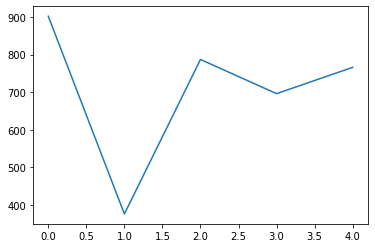

In [46]:
profits_60 = []
for i in range(len(test_rainy)):
    profit = \
        compute_profit(
        test_demand_pred.iloc[i].drop("Date").apply(int),
        test_demand.iloc[i].drop("Date").apply(int),
        taxi_num=60
    )
    profits_60.append(profit)
    
plt.plot(profits_60)
print(np.mean(profits_60), "±", np.std(profits_60))

1465.0 ± 970.2485248636042


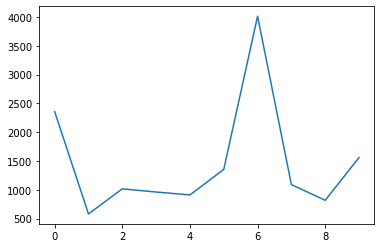

In [47]:
profits_300 = []
for i in range(len(test_non_rainy)):
    profit = \
        compute_profit(
        test_demand_pred.iloc[i].drop("Date").apply(int),
        test_demand.iloc[i].drop("Date").apply(int),
        taxi_num=300
    )
    profits_300.append(profit)

plt.plot(profits_300)
print(np.mean(profits_300), "±", np.std(profits_300))

### Caculate the actual Income by using real demand number

In [41]:
# Define compute_profit for Actual Income
def compute_profit_real(pred_demand, real_demand, taxi_num, log=False):
    order_and_price = {
        "ROBERTSON QUAY": 19,
        "NASSIM": 18,
        "ALEXANDRA HILL": 17,
        "BENDEMEER": 16,
        "TIONG BAHRU STATION": 16,
        "CHATSWORTH": 15,
        "CAIRNHILL": 14,
        "LEONIE HILL": 14
    }
    
    total_income = 0
    cost = 2
    #Looping the Dict
    for col, price in order_and_price.items():
        pred = pred_demand[col]
        real = real_demand[col]
        
        dispatch_num = min(taxi_num,real)
        taxi_num -= dispatch_num
        total_income += min(dispatch_num,real) * (price-cost)
        
        if log:
            print("Dispatch %d taxis to %s" % (dispatch_num, col))
            print("Income is $%d" % (min(dispatch_num, real) * price))
            print("Satisfaction rate is %.2f" % min(100, 100 * dispatch_num / real) + "%")
            print("---------------------")
   
    if log:
        print("Total income: $%d" % total_income)
    
    return total_income

827.6 ± 132.02817881043424


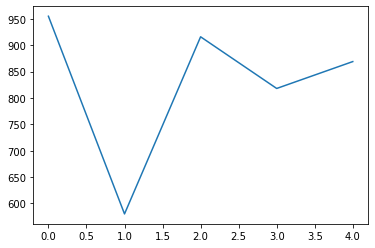

In [49]:
# Caculate Real Income for Rainy Day
profits_60_real = []
for i in range(len(test_rainy)):
    profit = \
        compute_profit_real(
        test_demand_pred.iloc[i].drop("Date").apply(int),
        test_demand.iloc[i].drop("Date").apply(int),
        taxi_num=60
    )
    profits_60_real.append(profit)
    
plt.plot(profits_60_real)
print(np.mean(profits_60_real), "±", np.std(profits_60_real))

1939.4 ± 1080.9726361013957


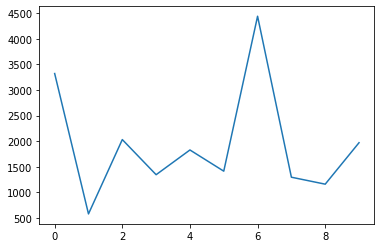

In [50]:
# Caculate Real Income for Non-Rainy Day
profits_300_real = []
for i in range(len(test_non_rainy)):
    profit = \
        compute_profit_real(
        test_demand_pred.iloc[i].drop("Date").apply(int),
        test_demand.iloc[i].drop("Date").apply(int),
        taxi_num=300
    )
    profits_300_real.append(profit)

plt.plot(profits_300_real)
print(np.mean(profits_300_real), "±", np.std(profits_300_real))

# 7) Any current challenges and/or future improvements?

Prediction for some locations are not extremely accurate, so sometimes we send less taxis to high-profit locations than they really demand and hence lose some profit. Also, we force each location to have the same demand distribution, that is the same as the total demand.

All this is due to limited data and the attempt so simplify the model. With more data we can improve our analytical model by increase its complexity. For example, each location can has it own unique demand distribution. The regression process can be non-linear (e.g. a rather large regression tree), etc.